In [3]:
from pre_processing.get_books import get_preprocessed_data
from pre_processing.frequency_inverse import get_freq_inverse
from pre_processing.get_all_words import get_all_words

from analysis.k_means import k_means_analysis


from analysis.cosine_similarity import get_cosine_similarity
from sklearn.manifold import MDS

from sklearn.cluster import KMeans
from analysis.multidimensional_scaling import get_multi_scaling_positions
from analysis.multidimensional_scaling import get_LSA_scaling_positions
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import nltk

NUMBERS_ONLY = False

IF_MIN = 0.2
IF_MAX = 0.8
N_GRAMS = 3

K_MEANS_N_CLUSTERS = 5

UseMDS=True

%matplotlib inline  


[nltk_data] Downloading package stopwords to /home/ayoung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
list_of_books = get_preprocessed_data(NUMBERS_ONLY)
frequency_term_matrix, terms= get_freq_inverse(list_of_books,IF_MAX,IF_MIN,N_GRAMS)


(24, 35157)


ValueError: too many values to unpack (expected 2)

In [ ]:

km = KMeans(n_clusters=K_MEANS_N_CLUSTERS)
km.fit(frequency_term_matrix)
clusters = km.labels_.tolist()


titles = []
published = []
authors = []
period = []
for book in list_of_books:
    authors.append(book.meta["author"])
    titles.append(book.meta["title"])
    published.append(book.meta["published"])
    period.append(book.meta["period"])

books = {'titles': titles, 'cluster': clusters, 'published': published, 'authors':authors, 'period':period}
frame = pd.DataFrame(books, index = [clusters] , columns = ['titles', 'cluster', 'published','authors', 'period']).sort_index()

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

In [ ]:
vocab_frame = pd.DataFrame({'words': all_words_list}, index=all_words_list)
cluster_names = {}
for i in range(K_MEANS_N_CLUSTERS):
    cluster_names[i] = []
cluster_names = {0:[],1:[],2:[],3:[],4:[]}
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

In [ ]:
if not NUMBERS_ONLY:
    for i in range(K_MEANS_N_CLUSTERS):
            #print("Cluster {} words:".format(i))
            for ind in order_centroids[i, :6]:  # replace 6 with n words per cluster
    #             print('{}'.format(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=','))
                cluster_names[i].append(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
else:
    for i in range(K_MEANS_N_CLUSTERS):
        #print("Cluster {} words:".format(i))
        for ind in order_centroids[i, :6]:  # replace 6 with n words per cluster
    #             print('{}'.format(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=','))
            cluster_names[i].append(vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])

In [ ]:
vocab_frame.head()

In [ ]:
posMDS = get_multi_scaling_positions(frequency_term_matrix, True)
posLSA = get_LSA_scaling_positions(frequency_term_matrix)

if UseMDS:
    pos = posMDS
else:
    pos = posLSA
posMDS

In [ ]:
graph_dict = {'x':pos[:, 0], 'y':pos[:, 1], 'label':clusters, 'title':titles}
df = pd.DataFrame(graph_dict)

groups = df.groupby('label')

clusters

In [ ]:
x_min, x_max = pos[:, 0].min() - 1, pos[:, 0].max() + 1
y_min, y_max = pos[:, 1].min() - 1, pos[:, 1].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


ig, ax = plt.subplots(figsize=(23, 13))  # set size
ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name][0:5],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params( \
        axis='x',  # changes apply to the x-axis
        which='both',  # both major and minor ticks are affected
    )
    ax.tick_params( \
        axis='y',  # changes apply to the y-axis
        which='both',  # both major and minor ticks are affected
       )

    ax.legend(numpoints=1)  # show legend with only 1 point
    ax.legend(loc='center left', bbox_to_anchor=(1,0.93))


# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# add label in x,y position with the label as the book title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=11)

df.ix[2]


In [ ]:
cluster_names[1]

In [ ]:
ig, ax = plt.subplots(figsize=(23, 13))  # set size
ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name][0:5],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params( \
        axis='x',  # changes apply to the x-axis
        which='both',  # both major and minor ticks are affected
    )
    ax.tick_params( \
        axis='y',  # changes apply to the y-axis
        which='both',  # both major and minor ticks are affected
       )

    ax.legend(numpoints=1)  # show legend with only 1 point
    ax.legend(loc='center left', bbox_to_anchor=(1,0.93))


# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# add label in x,y position with the label as the book title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=11)

df.ix[2]

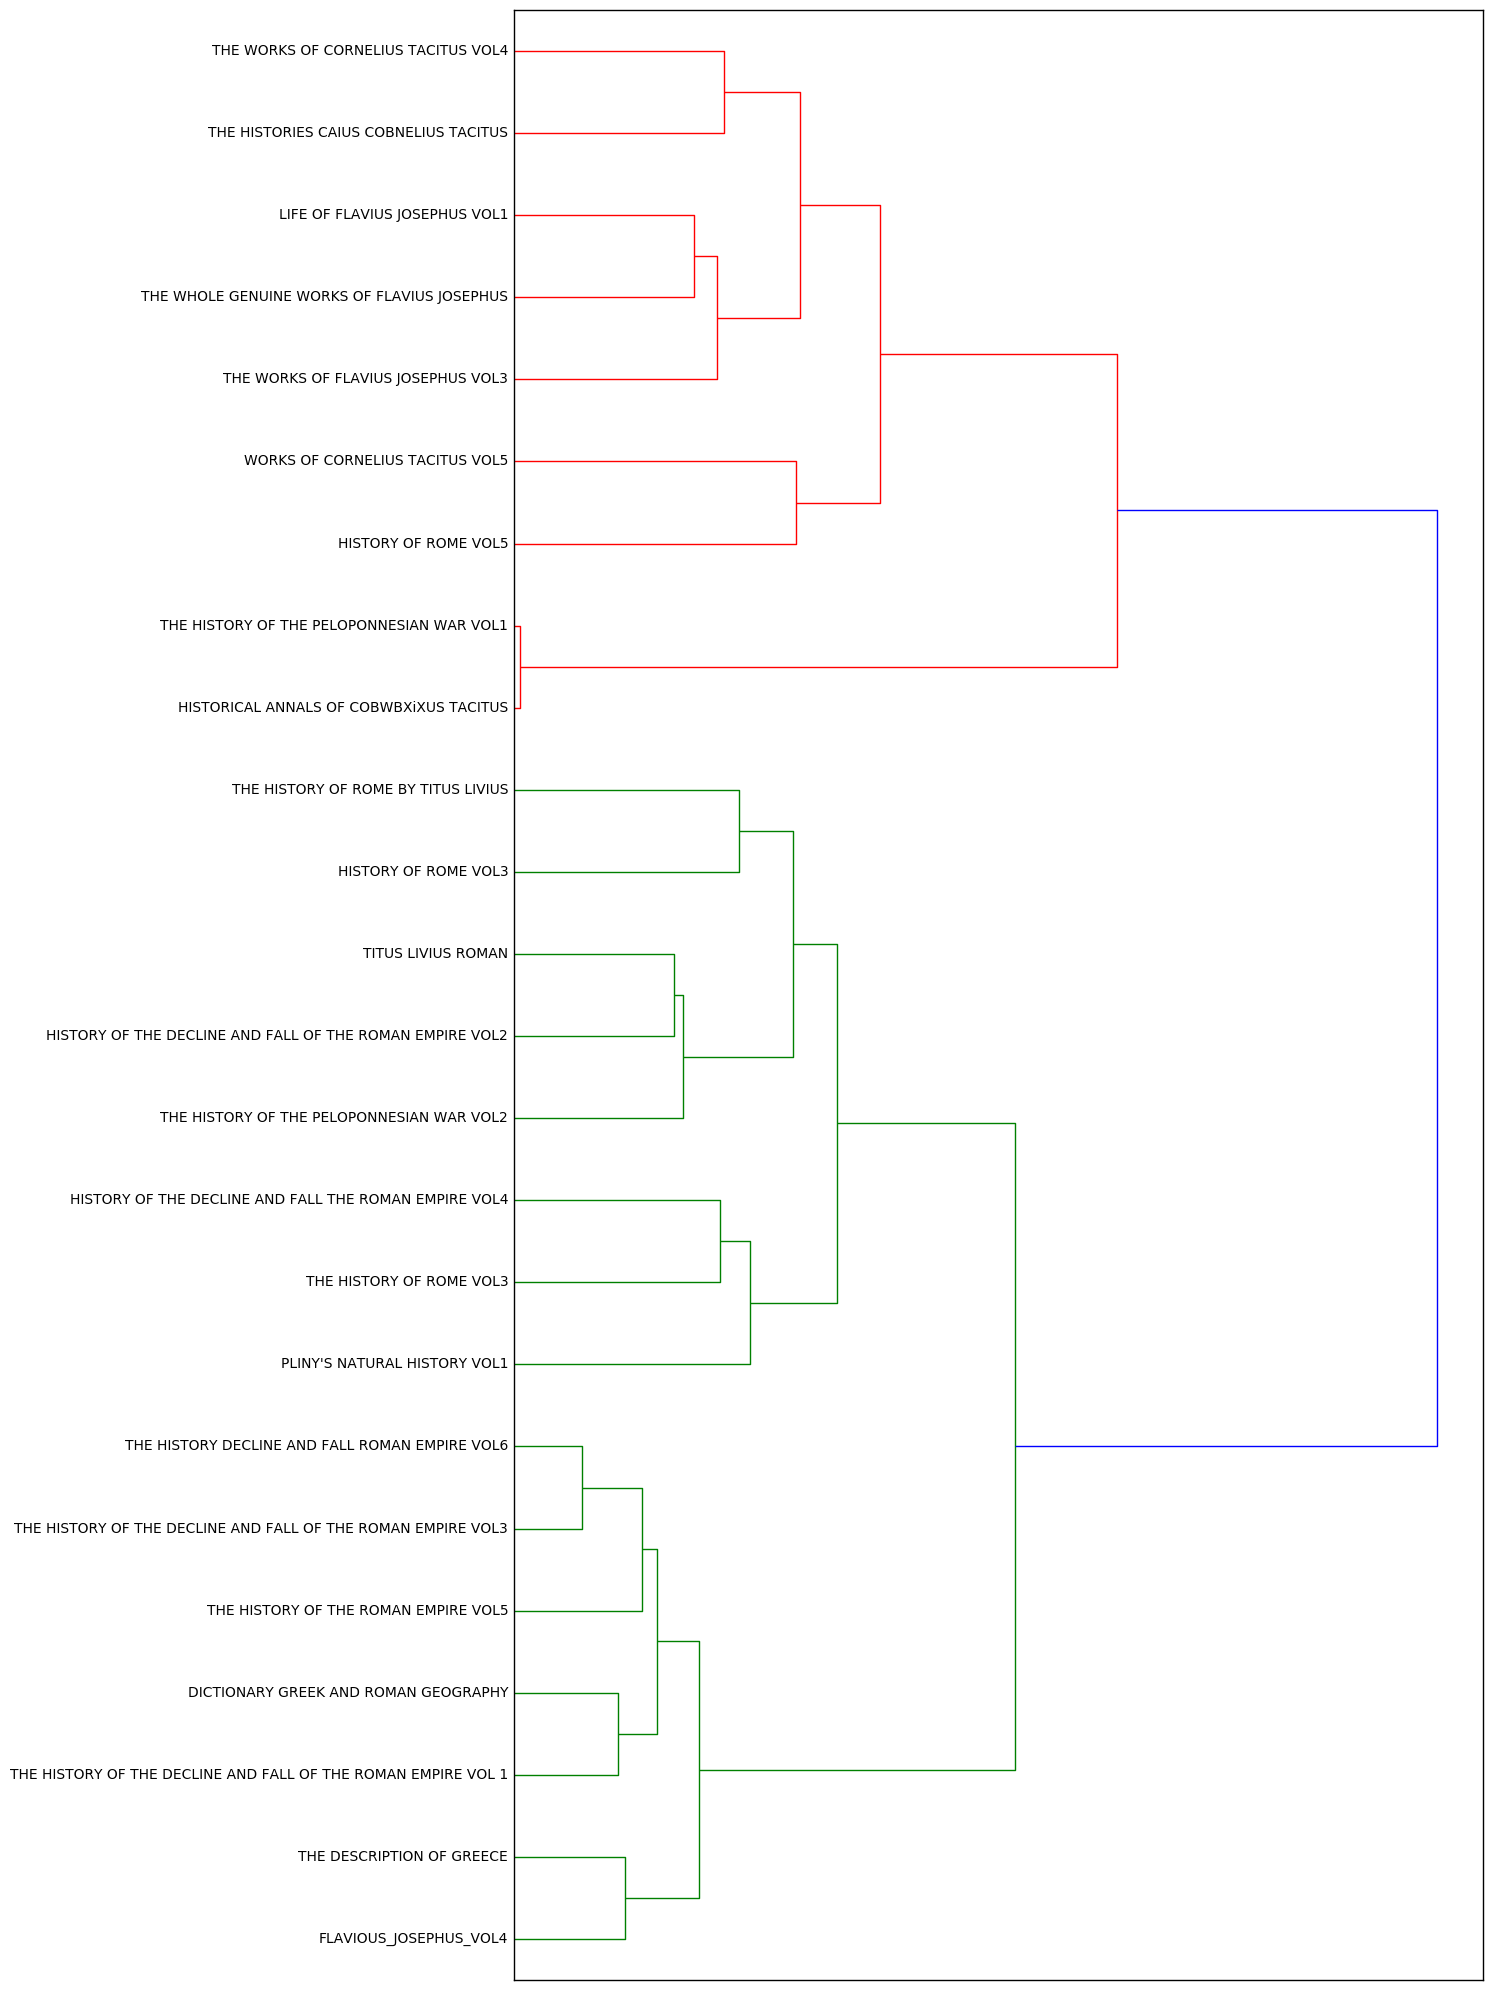

In [291]:

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters